# Proyecto de Día 11 - Análisis Predictivo para una Tienda Minorista

### Objetivo
Tu tarea consiste en desarrollar un **modelo predictivo** para una **tienda minorista** que desea pronosticar las ventas basándose en diversas características. La tienda ha estado recopilando datos sobre las ventas diarias y quiere utilizar esta información para tomar decisiones informadas sobre la *gestión de inventario*, *promociones* y *programación de personal*.

Tu objetivo es construir un modelo que pueda **predecir el total de ventas para el próximo mes**, utilizando datos de los meses anteriores.

### Tarea
**1. Preparación de Datos**
- Carga el conjunto de datos y realiza cualquier preprocesamiento necesario, como manejar **valores faltantes**, selección de **variables dependientes e independientes**, y dividir los datos en **conjuntos de entrenamiento** y **prueba**.


**2. Análisis Exploratorio de Datos (EDA)**
- Realiza un EDA para entender la distribución de las ventas y la relación entre las ventas y otras características. Esto podría incluir trazar las ventas a lo largo del tiempo, analizar las ventas en *festivos* vs. *no festivos* y el impacto de las promociones.

**3. Selección de Modelo**
- Utiliza el conocimiento que has adquirido sobre diferentes algoritmos para elegir el modelo más adecuado para esta tarea. Considera la **Regresión Lineal**, los **Árboles de Decisión**, y los **Bosques Aleatorios**.

**4. Entrenamiento y Evaluación del Modelo**
- Entrena tu modelo seleccionado en el conjunto de entrenamiento y evalúa su rendimiento utilizando el conjunto de prueba. Utiliza gráficos para visualizar las *ventas reales* vs. *las predichas*.

**5. Conclusión**

- Basado en los resultados iniciales, resume tus hallazgos y realiza recomendaciones para la tienda minorista sobre cómo utilizar el análisis predictivo para una mejor toma de decisiones.


### Nota
* Enfócate en la claridad y simplicidad de tu código.

¡Mucha Suerte!

### 1. Preparación de Datos

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


In [58]:
df = pd.read_csv("./Ventas.csv")
df.head()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484


In [34]:
# Informacion del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Fecha          365 non-null    object
 1   DíaDeLaSemana  365 non-null    int64 
 2   Promociones    365 non-null    int64 
 3   Festivo        365 non-null    int64 
 4   Ventas         365 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.4+ KB


In [59]:
# Cambiar tipo de datos a columna Fecha
df["Fecha"] = pd.to_datetime(df["Fecha"], format="%Y-%m-%d")
# Comprobar nuevo tipo de dato
print(  df["Fecha"].dtype )

datetime64[ns]


In [37]:
escala = MinMaxScaler(feature_range=(0, 1))

In [60]:
columnas = df.drop(["Fecha", "Ventas"], axis=1).columns
normalizado = escala.fit_transform(df[columnas])

In [61]:
df_normalizado = pd.DataFrame(data=normalizado, columns=columnas)
df_normalizado["Ventas"] = df["Ventas"]
df_normalizado["Fecha"] = df["Fecha"]
df_normalizado.head()

,DíaDeLaSemana,Promociones,Festivo,Ventas,Fecha
0,0.833333,0.0,0.0,4033,2022-01-01
1,1.000000,0.0,1.0,4012,2022-01-02
2,0.000000,0.0,0.0,1608,2022-01-03
3,0.166667,1.0,0.0,2046,2022-01-04
4,0.333333,0.0,0.0,2484,2022-01-05


### 3. Analisis Exploratorio de Datos (EDA)

In [40]:
# Obtener estadisticas descriptivas
df.describe()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
count,365,365.000000,365.000000,365.000000,365.000000
mean,2022-07-01 23:59:59.999999744,4.005479,0.200000,0.142466,2997.219178
min,2022-01-01 00:00:00,1.000000,0.000000,0.000000,1305.000000
25%,2022-04-02 00:00:00,2.000000,0.000000,0.000000,2195.000000
50%,2022-07-02 00:00:00,4.000000,0.000000,0.000000,3074.000000
75%,2022-10-01 00:00:00,6.000000,0.000000,0.000000,3979.000000
max,2022-12-31 00:00:00,7.000000,1.000000,1.000000,4404.000000
std,NaN,2.002738,0.400549,0.350007,942.096284


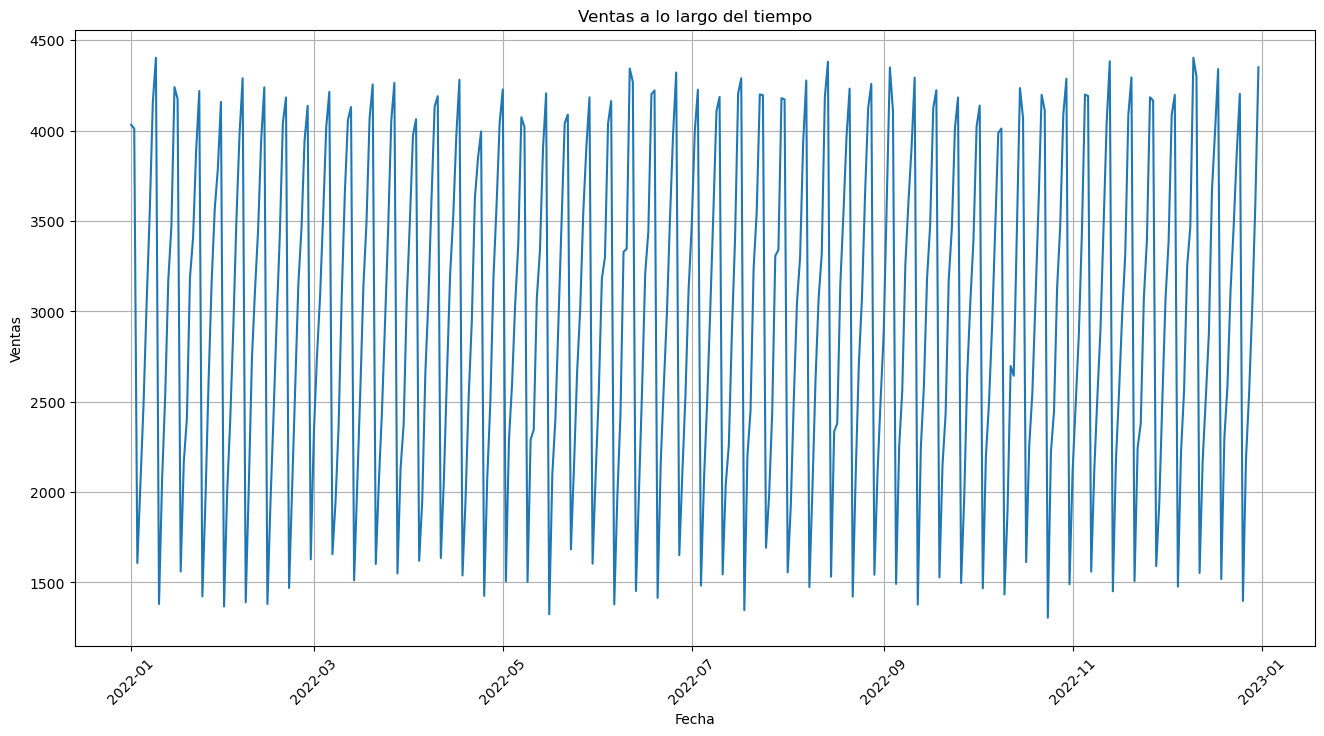

In [41]:
# Gráfica de Ventas a lo largo del tiempo
plt.figure(figsize=(16, 8))
plt.plot(
    df["Fecha"],
    df["Ventas"],
)
plt.title("Ventas a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


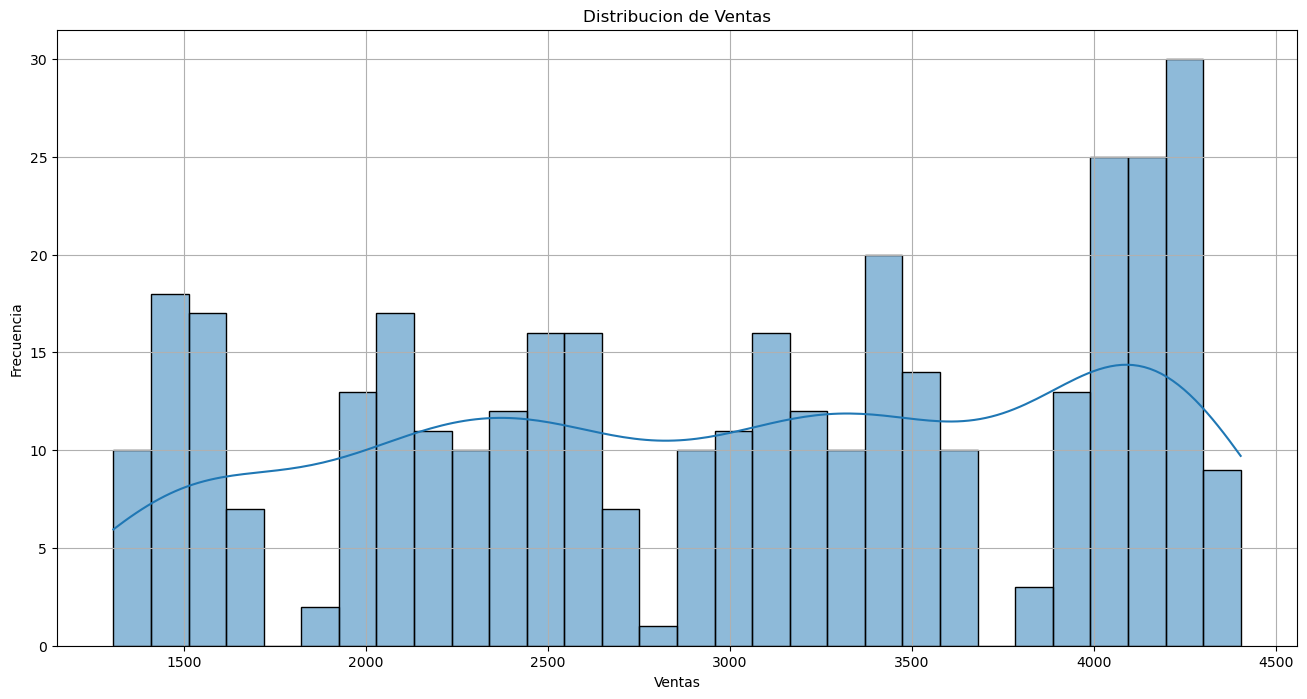

In [42]:
# Distribucion de Ventas
plt.figure(figsize=(16, 8))
sns.histplot(
    df["Ventas"], 
    kde=True,
    bins=30
)
plt.title("Distribucion de Ventas")
plt.xlabel("Ventas")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

<Axes: xlabel='Festivo', ylabel='Ventas'>

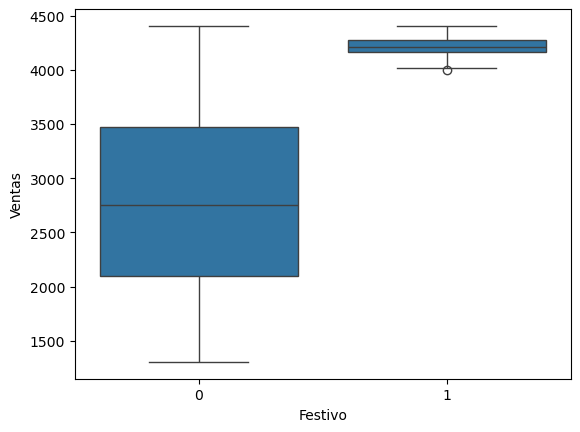

In [43]:
# Comparación días festivos
sns.boxplot(
    data=df, 
    x='Festivo', 
    y='Ventas'
)

- Para Festivo = 0 (días normales):
  - Hay más dispersión en las ventas (la caja es más alta).
  - El rango intercuartílico (Q1 a Q3) es amplio: las ventas típicas varían mucho entre los días.
  - Hay valores mínimos bajos (alrededor de 1300) y máximos altos (hasta 4400).
  - El valor mediano está cerca de 2800.
  - Hay mucha variabilidad → ventas inestables.

- Para Festivo = 1 (días festivos):

  - La caja es muy pequeña y más alta en valor.
  - La mediana está alrededor de 4250.
  - Las ventas son más estables y consistentemente altas.
  - Hay menos dispersión (la mayoría de valores están muy cerca entre sí).
  - Algunos puntos fuera del bigote podrían ser outliers, pero no muy alejados.

<Axes: xlabel='Promociones', ylabel='Ventas'>

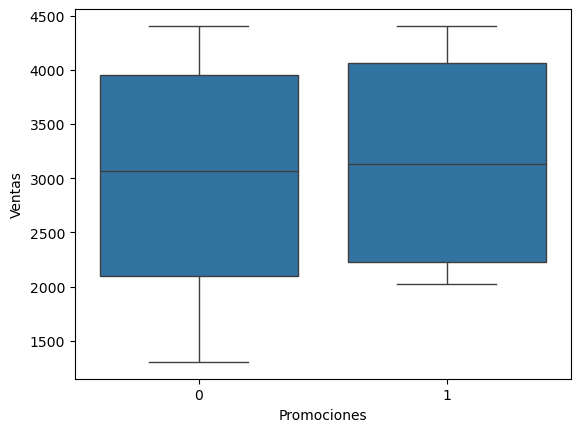

In [45]:
# Comparación promociones
sns.boxplot(
    data=df, 
    x='Promociones', 
    y='Ventas'
)

- Promociones = 0:

    - Mediana (línea dentro de la caja): ~3100
    - Distribución amplia: ventas van desde aproximadamente 1300 hasta 4400.
    - Hay mayor variabilidad (más días con ventas muy altas o muy bajas sin promociones).

- Promociones = 1:
        
    - Mediana ligeramente más alta: ~3200
    - Rango también amplio, pero los valores mínimos son un poco más altos que cuando no hay promociones.
    - Distribución parecida a la de sin promociones, aunque con un sesgo leve hacia ventas más altas.

<Axes: title={'center': 'Promedio Mensual de Ventas'}, xlabel='Mes'>

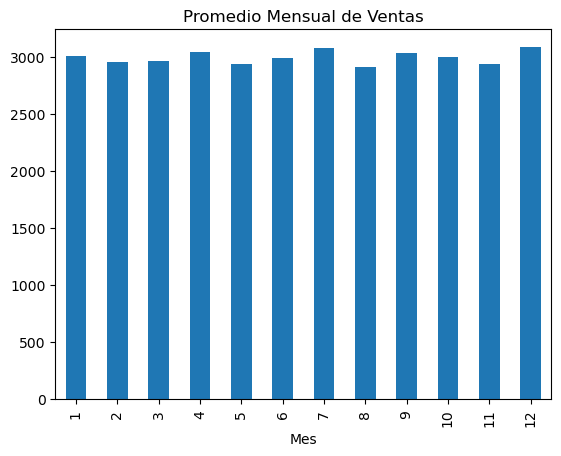

In [47]:
# Promedio Mensual de Ventas
df_con_mes=df.copy()
df_con_mes['Mes'] = df_con_mes['Fecha'].dt.month

df_con_mes.groupby('Mes')['Ventas'].mean().plot(kind='bar', title="Promedio Mensual de Ventas")

<Axes: title={'center': 'Ventas Mensuales'}, xlabel='Mes'>

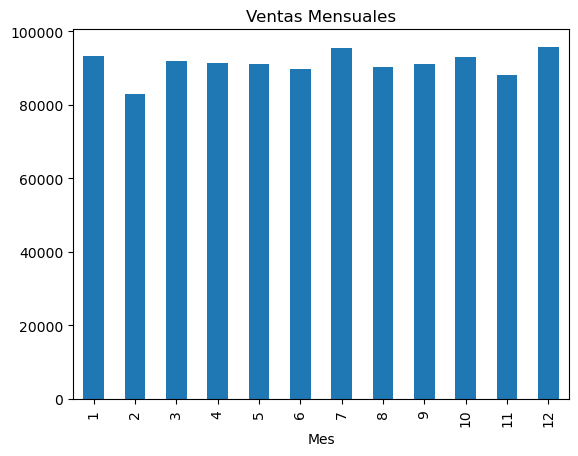

In [48]:
# Ventas mensuales
df_con_mes.groupby('Mes')['Ventas'].sum().plot(kind='bar', title="Ventas Mensuales")

<Axes: title={'center': 'Promedio de Ventas por Día de la Semana'}, xlabel='Día de la Semana', ylabel='Ventas Promedio'>

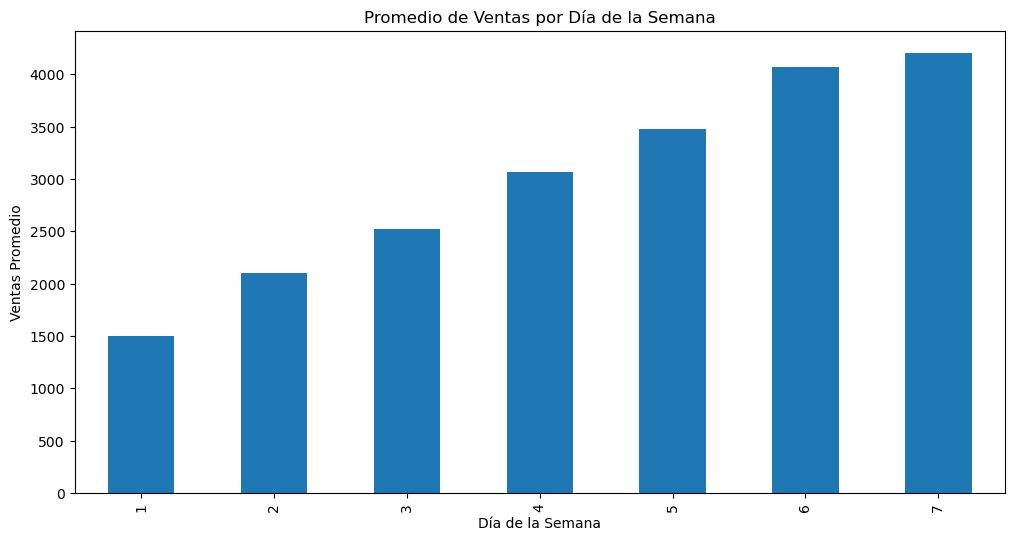

In [49]:
# Promedio de Ventas por Día de la Semana
plt.figure(figsize=(12,6))
df.groupby('DíaDeLaSemana')['Ventas'].mean().plot(
    kind='bar', 
    title="Promedio de Ventas por Día de la Semana",
    xlabel="Día de la Semana",
    ylabel="Ventas Promedio"
)

### 3. Selección de Modelo

In [63]:
X = df_normalizado.drop(['Ventas', 'Fecha'], axis=1)
X.head()

,DíaDeLaSemana,Promociones,Festivo
0,0.833333,0.0,0.0
1,1.000000,0.0,1.0
2,0.000000,0.0,0.0
3,0.166667,1.0,0.0
4,0.333333,0.0,0.0


In [64]:
y = df["Ventas"]
y.head()

0    4033
1    4012
2    1608
3    2046
4    2484
Name: Ventas, dtype: int64

In [62]:
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, train_size=0.8, random_state=42)

In [76]:
modelos = {
    ("Regresión lineal", LinearRegression()),
    ("Árbol de decisión", DecisionTreeRegressor(random_state=42)),
    ("Bosques aleatorios", RandomForestRegressor(random_state=42))
}

In [84]:
puntajes = {}
for nombre, modelo in modelos:
    modelo.fit(X_entrena, y_entrena)
    puntaje = modelo.score(X_prueba, y_prueba)
    print(f'{nombre}: {puntaje}')
    puntajes[nombre] = puntaje

mejor_modelo = max(puntajes, key=puntajes.get)
print(f"El mejor modelo es {mejor_modelo} con un puntaje de {puntajes[mejor_modelo]}")


Árbol de decisión: 0.9923508015371342
Regresión lineal: 0.9924245101323563
Bosques aleatorios: 0.9923097376813321
El mejor modelo es Regresión lineal con un puntaje de 0.9924245101323563


### 4. Entrenamiento y evaluación del Modelo

In [85]:
modelo = LinearRegression()

In [86]:
modelo.fit(X_entrena, y_entrena)

LinearRegression()

In [90]:
prediccciones = modelo.predict(X_prueba)

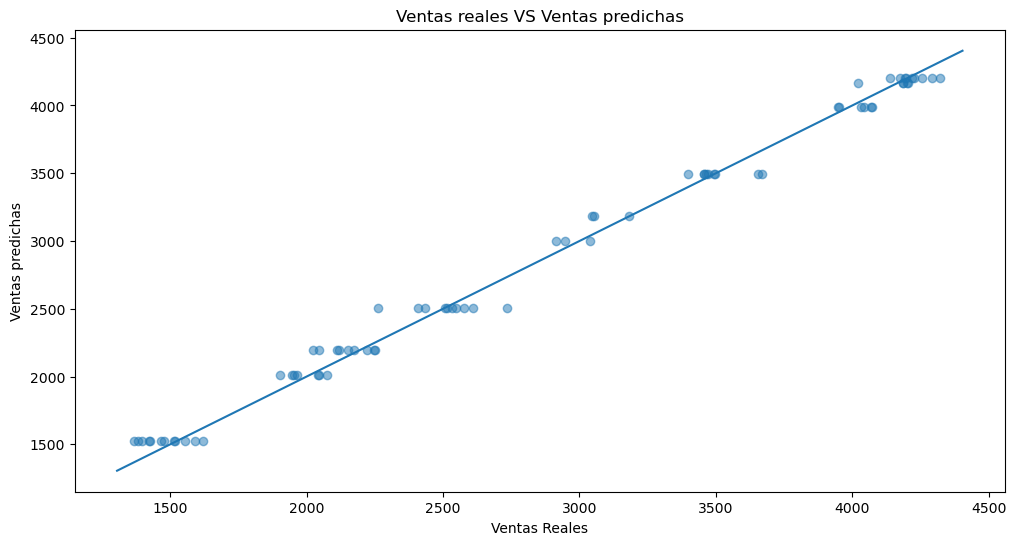

In [95]:
# Gráfica con valores reales y predicciones
plt.figure(figsize=(12,6))
plt.scatter(
    y_prueba,
    prediccciones,
    alpha=0.5
)
plt.plot(
    [y.min(), y.max()],
    [y.min(), y.max()],
)
plt.xlabel("Ventas Reales")
plt.ylabel("Ventas predichas")
plt.title("Ventas reales VS Ventas predichas")
plt.show()

In [100]:
df_tets = pd.DataFrame({
    "Real" : y_prueba,
    "Prediccion" : prediccciones
})
df_tets = df_tets.sort_index()
df_tets["Error"] = df_tets["Real"] - df_tets["Prediccion"]

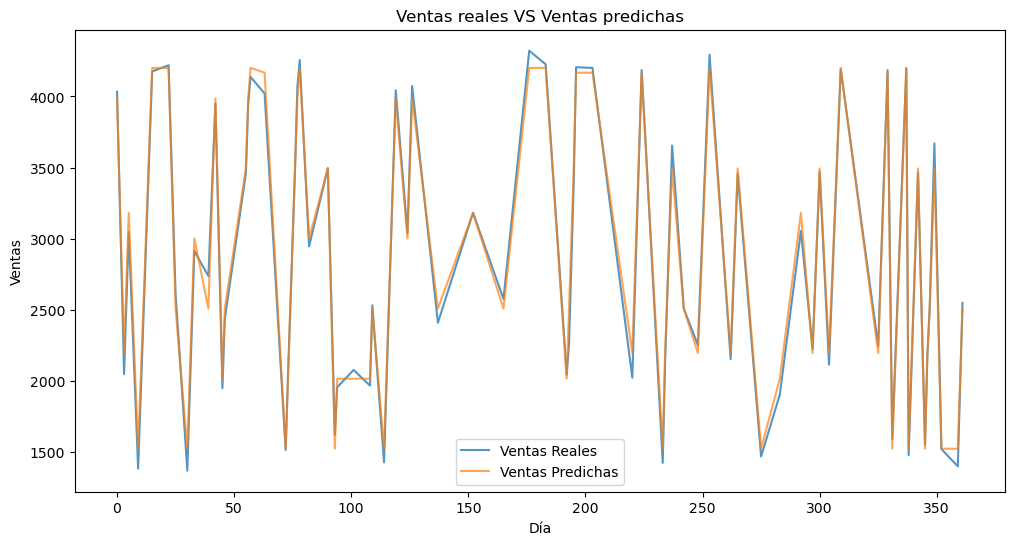

In [108]:
plt.figure(figsize=(12,6))
plt.plot(
    df_tets["Real"],
    label="Ventas Reales",
    alpha=0.77	
)

plt.plot(
    df_tets["Prediccion"],
    label="Ventas Predichas",
    alpha=0.7
)

plt.xlabel("Día")
plt.ylabel("Ventas")
plt.title("Ventas reales VS Ventas predichas")
plt.legend()
plt.show()

### 5. Conclusiones

- En días festivos, las ventas son más altas y consistentes.
- En días normales, las ventas son más variables, con algunos días muy bajos y otros muy altos.
- Esto podría indicar que los festivos tienen un efecto positivo claro en las ventas, tal vez por mayor afluencia de personas o campañas específicas.
- Las promociones parecen tener un leve efecto positivo sobre las ventas. Sin embargo, la diferencia no es muy marcada como en el caso de los días festivos.